In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Lab4 excel.xlsx to Lab4 excel.xlsx


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
df =pd.read_excel('Lab4 excel.xlsx')
display(df)

,Reading,Hours,Min,Elevation,Theoretical Gravity
0,6025.805,15,2,124.000,978413.7524
1,6039.412,15,25,82.076,978409.8528
2,6038.804,15,36,82.397,978409.4198
3,6037.085,15,48,90.179,978409.0160
4,6035.111,16,0,91.848,978408.5273
5,6036.481,16,12,91.095,978408.0913
6,6035.823,16,26,85.827,978407.6609
7,6032.967,16,36,89.686,978407.2542
8,6030.817,16,44,93.644,978406.7851
9,6041.008,17,8,84.092,978410.5963


In [ ]:
#df.iloc[14,4]=978409.1228

In [ ]:
Hour=df.iloc[:,1]
min=df.iloc[:,2]
time=(np.array(Hour))+(min/60)

print(time)

0     15.033333
1     15.416667
2     15.600000
3     15.800000
4     16.000000
5     16.200000
6     16.433333
7     16.600000
8     16.733333
9     17.133333
10    17.366667
11    17.500000
12    17.733333
13    17.900000
14    18.083333
15    18.283333
16    18.850000
Name: Min, dtype: float64


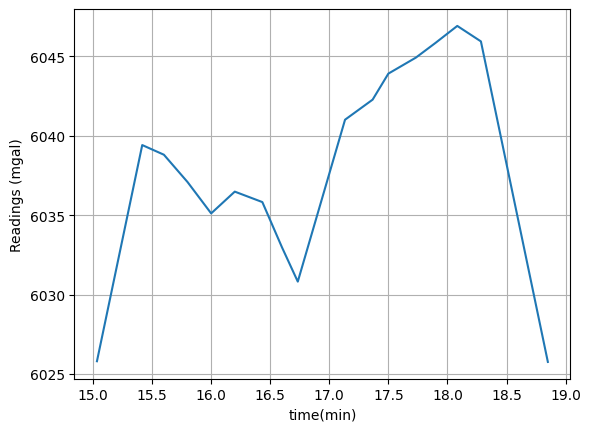

-0.011266375546002126 6025.974371179042
0     6025.805000
1     6025.800681
2     6025.798616
3     6025.796362
4     6025.794109
5     6025.791856
6     6025.789227
7     6025.787349
8     6025.785847
9     6025.781341
10    6025.778712
11    6025.777210
12    6025.774581
13    6025.772703
14    6025.770638
15    6025.768384
16    6025.762000
Name: Min, dtype: float64


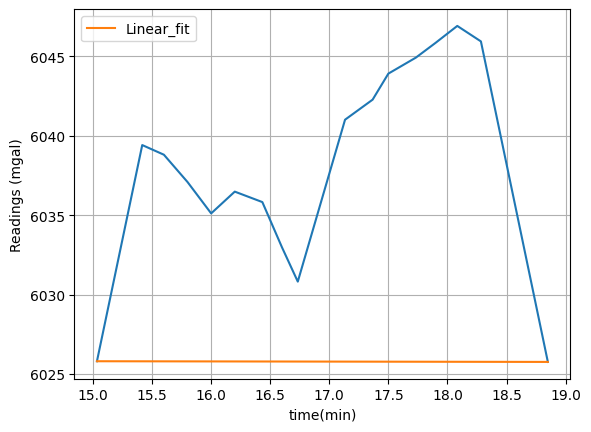

In [ ]:
x=[0,16]
t=[];R=[]
for i in x:
  list_t=time[i];list_r=df.iloc[i,0]
  t.append(list_t);R.append(list_r)
res = stats.linregress(t,R)
m=res.slope
c=res.intercept
print(m,c)
y=m*time+c
print(y)
plt.plot(time,df['Reading'])
plt.xlabel("time(min)")
plt.ylabel("Readings (mgal)")
plt.plot(time,y,label="Linear_fit")
plt.legend()
plt.grid()

,Readings,Drift_correction,Drift,Relative_value_wrt Base
0,6025.805,6025.805000,0.000000,0.000000
1,6039.412,6039.416319,-0.004319,13.611319
2,6038.804,6038.810384,-0.006384,13.005384
3,6037.085,6037.093638,-0.008638,11.288638
4,6035.111,6035.121891,-0.010891,9.316891
5,6036.481,6036.494144,-0.013144,10.689144
6,6035.823,6035.838773,-0.015773,10.033773
7,6032.967,6032.984651,-0.017651,7.179651
8,6030.817,6030.836153,-0.019153,5.031153
9,6041.008,6041.031659,-0.023659,15.226659


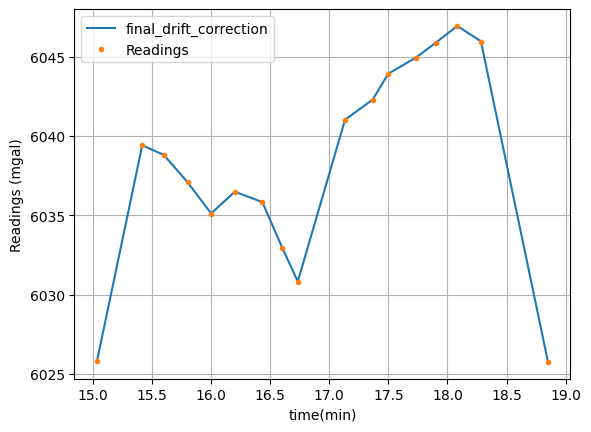

In [ ]:
yy=df.iloc[:,0]
drift=y-yy[0]
drift_corrected_readings=yy-drift
Relative_value_wrt_Base=drift_corrected_readings-yy[0]
table=pd.DataFrame({'Readings':yy,'Drift_correction':drift_corrected_readings,"Drift":drift," Relative_value_wrt Base":Relative_value_wrt_Base})
display(table)
plt.plot(time,drift_corrected_readings,label="final_drift_correction")
#plt.scatter(time,df['Reading'],label="initial")
plt.xlabel("time(min)")
plt.ylabel("Readings (mgal)")
plt.plot(time,df['Reading'],".",label="Readings")
plt.legend()
plt.grid()

In [ ]:
g_lat=df.iloc[:,4]
h=df.iloc[:,3]
rho=2.85

In [ ]:
g_abs=978344.4588
g_diff=g_abs+Relative_value_wrt_Base

g_FA=np.array(g_diff)-np.array(g_lat)-0.3086*np.array(h)
g_BA=g_FA+0.0419*rho*np.array(h)
table2=pd.DataFrame({'g_diff':g_diff,'g_lat':g_lat,'g_FA':g_FA,'g_BA':g_BA})
display(table2)

,g_diff,g_lat,g_FA,g_BA
0,978344.458800,978413.7524,-107.560000,-92.752540
1,978358.070119,978409.8528,-77.111335,-67.310229
2,978357.464184,978409.4198,-77.383330,-67.543892
3,978355.747438,978409.0160,-81.097802,-70.329077
4,978353.775691,978408.5273,-83.095902,-72.127873
5,978355.147944,978408.0913,-81.055273,-70.177163
6,978354.492573,978407.6609,-79.654539,-69.405508
7,978351.638451,978407.2542,-83.292849,-72.582995
8,978349.489953,978406.7851,-86.193686,-75.011187
9,978359.685459,978410.5963,-76.861632,-66.819786


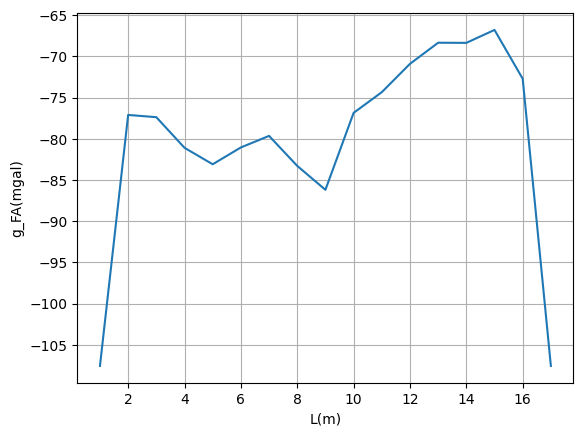

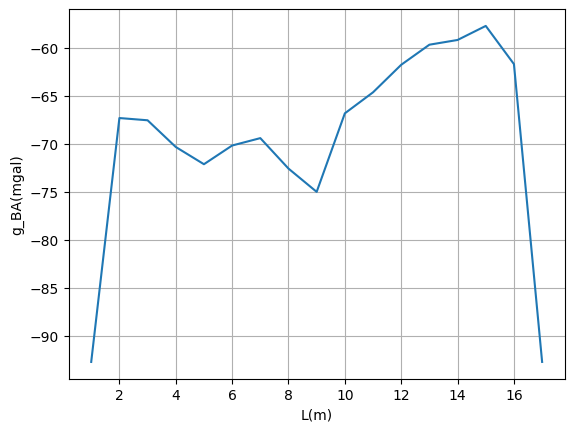

In [ ]:
L=np.linspace(1,17,17)
degree = 2  # Choose degree of the polynomial
coeffs_FA = np.polyfit(L, g_FA, degree)
poly_FA = np.poly1d(coeffs_FA)
plt.plot(L,g_FA)
plt.xlabel("L(m)")
plt.ylabel("g_FA(mgal)")
plt.grid()
plt.show()
plt.plot(L,g_BA)
plt.xlabel("L(m)")
plt.ylabel("g_BA(mgal)")
plt.grid()
plt.show()